### ORB

In [5]:
# 0906.py
import cv2
import numpy as np

#1 오차보다 작은 특징점 삭제
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])

#2
src = cv2.imread('c:/data/temp/mouse1.jpg')
src = cv2.resize(src, (512, 512))
# src = cv2.imread('c:/data/cornerTest.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

##orbF = cv2.ORB_create()          
orbF = cv2.ORB_create(scoreType=1)
kp= orbF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
filtered_kp = list(filter(lambda f: f.response>50, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = orbF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

#4
dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 480
len(filtered_kp)= 57
des.shape= (57, 32)
des= [[  2 144 180 ...  12 157 215]
 [130 184 155 ...   0 161 171]
 [120 167 184 ...  64 135 227]
 ...
 [ 80 169 153 ...  34   7  42]
 [127  32  33 ...  39  59 116]
 [105  40 157 ... 168  82  40]]


### BRICK

In [4]:
# 0908.py
import cv2
import numpy as np

dstE = 10

#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
#2
src = cv2.imread('c:/data/temp/mouse1.jpg')
src = cv2.resize(src, (512, 512))
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

briskF = cv2.BRISK_create()
kp= briskF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
filtered_kp = list(filter(lambda f: f.response>50, kp))
filtered_kp = filteringByDistance(kp, dstE)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = briskF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

#4
dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 536
len(filtered_kp)= 135
des.shape= (135, 64)
des= [[251 255 231 ...  50 230 228]
 [255 255 231 ... 205 157  27]
 [207 255 255 ...  32  96 192]
 ...
 [207 191  36 ...  16 125 114]
 [148 123 223 ...   8  16   0]
 [148 123 199 ...  42 137   0]]


### KAZE

In [ ]:
# 0910.py
import cv2
import numpy as np

dstE = 50

#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
#2
src = cv2.imread('c:/data/temp/mouse1.jpg')
src = cv2.resize(src, (512, 512))
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

kazeF = cv2.KAZE_create()
akazeF = cv2.AKAZE_create()
kp= kazeF.detect(gray)
##kp= akazeF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
##filtered_kp = list(filter(lambda f: f.response>0.01, kp))
filtered_kp = filteringByDistance(kp, dstE)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = kazeF.compute(gray, filtered_kp)
##kp, des =akazeF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des.dtype=', des.dtype)
print('des=', des)

#4
dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

### SIFT

In [25]:
# 09011.py
import cv2
import numpy as np

#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
#2
src = cv2.imread('c:/data/temp/mouse1.jpg')
src = cv2.resize(src, (512, 512))
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

siftF = cv2.SIFT_create()
# siftF = cv2.SIFT_create(edgeThreshold = 20)

kp= siftF.detect(gray)
print('len(kp)=', len(kp))

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
##filtered_kp = list(filter(lambda f: f.response>0.01, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = siftF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des.dtype=', des.dtype)
print('des=', des)

#4
dst = cv2.drawKeypoints(src, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst, [box], True, (0,255,0), 2)
    cv2.circle(dst, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 169
len(filtered_kp)= 72
des.shape= (72, 128)
des.dtype= float32
des= [[  0.   1.   2. ...   0.   2.   6.]
 [ 16.   0.   0. ...   0.   0.   1.]
 [  0.   0.   1. ...   1.   0.  24.]
 ...
 [ 24.   4.   1. ...   7.   2.   4.]
 [ 77.  41.   1. ...  19.   2.  16.]
 [ 45. 105.  32. ...  10.   0.   2.]]


### HOG

HOG feature size =  3780
des1.shape= (34020,)
des2.shape= (34020,)
des3.shape= (34020,)
des4.shape= (34020,)


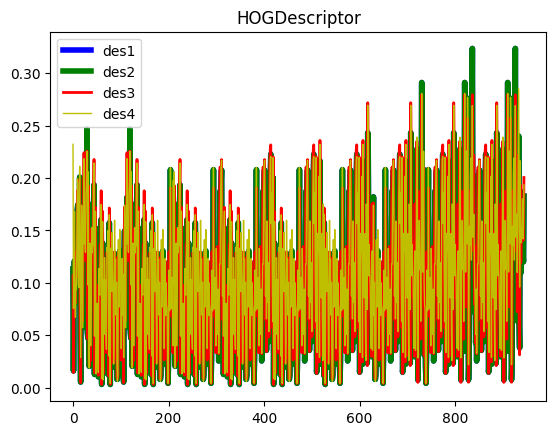

In [35]:
# 0916.py
import cv2
from   matplotlib import pyplot as plt

src = cv2.imread('c:/data/temp/mouse1.jpg')
src = cv2.resize(src, (128, 128))
#1: HOG in color image
hog1 = cv2.HOGDescriptor()
des1 = hog1.compute(src)
print("HOG feature size = ",  hog1.getDescriptorSize())
print('des1.shape=', des1.shape)
##print('des1=', des1)


#2: HOG in color image
hog2 = cv2.HOGDescriptor(_winSize=(64, 128),
                         _blockSize=(16,16),
                         _blockStride=(8,8),
                         _cellSize=(8,8),
                         _nbins=9,
                         _derivAperture=1,
                         _winSigma= -1,
                         _histogramNormType=0,
                         _L2HysThreshold=0.2,
                         _gammaCorrection=True,
                         _nlevels=64,
                         _signedGradient=False)

des2 = hog2.compute(src)
print('des2.shape=', des2.shape)
##print('des2=', des2)

#3: 
hog3 = cv2.HOGDescriptor(_winSize=(64, 128),
                         _blockSize=(16,16),
                         _blockStride=(8,8),
                         _cellSize=(8,8),
                         _nbins=9)   # _gammaCorrection=False
des3 = hog3.compute(src)
print('des3.shape=', des3.shape)
##print('des3=', des3)

#4 HOG in grayscale image
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
des4 = hog3.compute(gray)
print('des4.shape=', des4.shape)
##print('des4=', des4)

#5
plt.title('HOGDescriptor')
plt.plot(des1[::36], color='b',linewidth=4,label='des1')
plt.plot(des2[::36], color='g',linewidth=4,label='des2')
plt.plot(des3[::36], color='r',linewidth=2,label='des3')
plt.plot(des4[::36], color='y',linewidth=1,label='des4')
plt.legend(loc='best')
plt.show()

### histogram

hist H =  0.0 33105.0 (0, 74) (0, 88)
hist S =  0.0 22683.0 (0, 112) (0, 14)


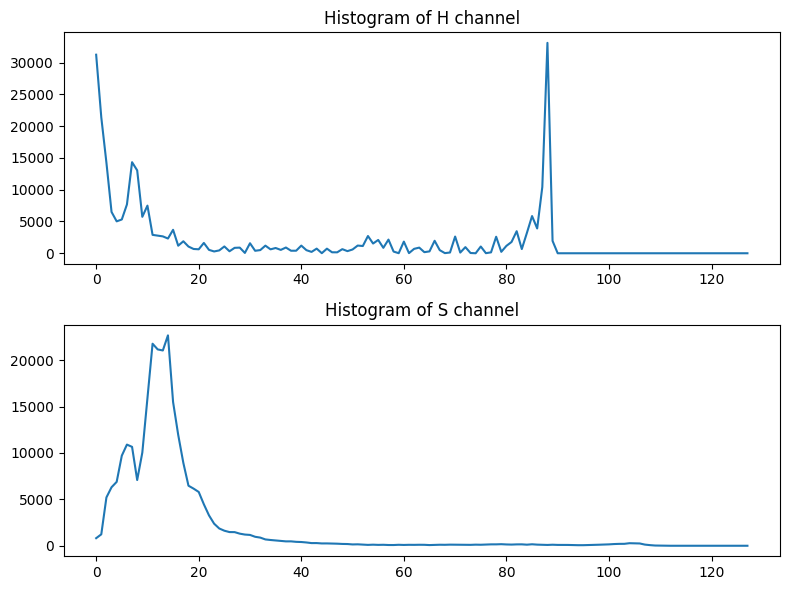

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/temp/mouse1.jpg')
src = cv2.resize(src, (512, 512))

# Convert image from BGR to HSV
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# Calculate histograms for the H and S channels
hist_h = cv2.calcHist(images=[hsv], channels=[0], mask=None, histSize=[128], ranges=[0, 256])
hist_s = cv2.calcHist(images=[hsv], channels=[1], mask=None, histSize=[128], ranges=[0, 256])

min_h, max_h, lmin_h, lmax_h = cv2.minMaxLoc(hist_h)
print('hist H = ', min_h, max_h, lmin_h, lmax_h)
min_s, max_s, lmin_s, lmax_s = cv2.minMaxLoc(hist_s)
print('hist S = ', min_s, max_s, lmin_s, lmax_s)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
fig.canvas.manager.set_window_title('plt')

# Flatten the histograms
hist_h = hist_h.flatten()
hist_s = hist_s.flatten()

# Plot the histogram for the H channel
ax[0].plot(hist_h)
ax[0].set_title('Histogram of H channel')

# Plot the histogram for the S channel
ax[1].plot(hist_s)
ax[1].set_title('Histogram of S channel')

plt.tight_layout()
plt.show()